<a href="https://colab.research.google.com/github/PamelaKinga/feature_selection/blob/main/Chi2_and_SelectKBest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Feature Selection**: Basic Methods - Univariate Selection Methods (SelectKBest with the Chi2 test statistic)

**Data:** from [Kaggle's Mushroom Classification dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification). The data was donated to the UCI Machine Learning repository and includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). The goal is to determine which mushrooms are edible or poisonous using data of mushroom characteristics. This is a classification problem.

# Data

In [ ]:
# First mount Gdrive to Colab for these steps to work
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d uciml/mushroom-classification

In [16]:
! unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


# Install Libraries

In [47]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

In [26]:
df=pd.read_csv('mushrooms.csv')

In [ ]:
df.shape

In [ ]:
df.info()

In [37]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Pre-Processing 

In [ ]:
# Setting up the target variable and creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['class_encoded'] = labelencoder.fit_transform(df['class'])
df

Before performing the chi-square test, make sure the data is label encoded

In [ ]:
# Converting categorical variables to numerical values using dummies
# Assigning numerical values and storing in another column
df['ring_type_encoded'] = labelencoder.fit_transform(df['ring-type'])
df

In [ ]:
# Converting categorical variables to numerical values using dummies
# Assigning numerical values and storing in another column
df['cap_color_encoded'] = labelencoder.fit_transform(df['cap-color'])
df

In [ ]:
# Converting categorical variables to numerical values using dummies
# Assigning numerical values and storing in another column
df['spore_print_color_encoded'] = labelencoder.fit_transform(df['spore-print-color'])
df

# Create Chi2 Test Variable

Chi2 test works on categorical variables or discrete variables

In [34]:
# Create a function to accept crosstab tables created to test features, and a confidence interval value to validate the hypothesis against
# Uses the stats API which has the function chi2_contingency 
# Feature and target columns must be categorical or discrete

def check_categorical_dependency(crosstab_table, confidence_interval):
  stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
  print("Chi-Square Statistic value = {}".format(stat))
  print("P - Value = {}".format(p))
  alpha = 1.0 - confidence_interval
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  return expected

# Univariate Testing

First create crosstabs between feature and target variables. This will be used to test the feature against the target ('class') on the feature for inclusion in the feature set, based on the null hypothesis.

Here, testing three variables: cap-color, ring-type, spore-print-color

In [ ]:
# Crosstabs of feature and target combinations
cap_color_crosstab = pd.crosstab(df['cap-color'], df['class'], margins = True)
cap_color_crosstab

In [ ]:
ring_type_crosstab = pd.crosstab(df['ring-type'], df['class'], margins = True)
ring_type_crosstab

In [ ]:
spore_print_color_crosstab = pd.crosstab(df['spore-print-color'], df['class'], margins = True)
spore_print_color_crosstab

Test each crosstab against the Chi2 test statistic to reject or accept the null hypothesis that the relationship between the target and feature is independent.

In [35]:
# Pass cross-tab table and the confidence interval to check against
exp_table_1 = check_categorical_dependency(cap_color_crosstab, 0.95)

Chi-Square Statistic value = 387.59776897722986
P - Value = 7.605907803439184e-70
Dependent (reject H0)


In [36]:
# Pass cross-tab table and the confidence interval to check against
exp_table_2 = check_categorical_dependency(ring_type_crosstab, 0.95)

Chi-Square Statistic value = 2956.6192780575316
P - Value = 0.0
Dependent (reject H0)


In [40]:
# Pass cross-tab table and the confidence interval to check against
exp_table_3 = check_categorical_dependency(spore_print_color_crosstab, 0.95)

Chi-Square Statistic value = 4602.0331700846045
P - Value = 0.0
Dependent (reject H0)


In [ ]:
# Observe the expected values of a table
pd.DataFrame(exp_table_3)

# Feature Selection using Chi-Square

In [60]:
X = df[["ring_type_encoded","cap_color_encoded", "spore_print_color_encoded"]]

In [61]:
y = df[["class_encoded"]]

In [72]:
X_new = SelectKBest (chi2, k="all").fit_transform(X,y)
#X_new = SelectKBest (chi2, k=1).fit_transform(X,y)

In [73]:
# The Chi2 method has selected the top feature
X_new.shape

(8124, 3)

Visualize the p-values of the features

In [74]:
chi_scores = chi2(X,y)

In [76]:
# Here the first array represents chi square values and second array represnts p-values
chi_scores

(array([1950.61014644,   11.51138164,  379.13272877]),
 array([0.00000000e+00, 6.91713451e-04, 1.92211948e-84]))

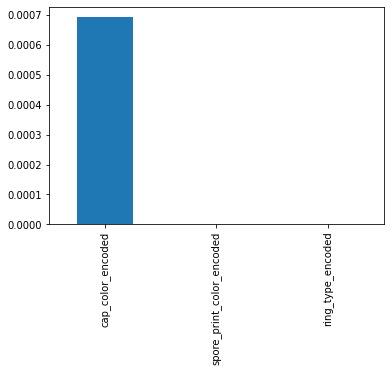

In [77]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

This is an example of implementing the Chi2 statistic in the SelectKBest feature selection method.